In [57]:
#mount coloab
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab_Notebooks/akhavan_poor/deeplearning_class

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks/akhavan_poor/deeplearning_class


In [54]:
import tensorflow as tf 
import tensorflow_datasets as tfds
from tensorflow import keras
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions
from keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input,decode_predictions
from tf_data import TF_Dataa
import tensorflow_datasets as tfds
from keras import Model, Sequential
import os 
import zipfile


In [3]:
#downlaod  data from kaggle 
# ! pip install kaggle

In [4]:
# ! mkdir ~/.kaggle

In [5]:
# ! cp kaggle.json ~/.kaggle/

In [6]:
# ! chmod 600 ~/.kaggle/kaggle.json

In [7]:
# ! kaggle datasets download jangedoo/utkface-new

In [8]:
# with zipfile.ZipFile("utkface-new.zip", 'r') as zip_ref:
#     zip_ref.extractall(os.getcwd())


In [9]:
!ls

 100img						    model.png
'age-gender detection using functional api.ipynb'   UTKFace
 crop_part1					    utkface_aligned_cropped
 model_checkpoints				    utkface-new.zip


In [17]:
data_dir = os.getcwd()+"/UTKFace"
data_dir

'/content/drive/MyDrive/Colab_Notebooks/akhavan_poor/deeplearning_class/UTKFace'

#### load train validation test data as tf data

In [19]:
mytfds = TF_Dataa(
    directory=data_dir, 
    validation_size=0.2,
    test_size = 0.2,
    batch_size = 64, 
    shuffle_buffer_size = 10000,
    augmentation = True , 
    shuffle_dataset = True , 
    input_target_size=[150,150,3]
)

In [20]:
train_dataset, validation_dataset, test_dataset =mytfds.train_validation_split()

********* train_validation_split ***************
********* get_fullDataset *************** 
full datast size is: 23708 
train size: 14224, validation size:4743 , test size =4741
********* load_image_train ***************
********* load_image_with_label ***************
********* getTrainValidationData ***************  3
********* load_image_test ***************
********* load_image_with_label ***************
********* getTrainValidationData ***************  3
********* load_image_test ***************
********* load_image_with_label ***************
********* getTrainValidationData ***************  3


# load pre-trained model form keras application

In [21]:
#load model
base_model = MobileNetV2(weights="imagenet", include_top=False)

9420800/9406464 [==============================] - 0s 0us/step


In [22]:
base_model.trainable = True 
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                                32)                                            

In [23]:
for layer in base_model.layers:
  if "block_16" in layer.name:
    print(layer.name)
    layer.trainable = True
  else:
    layer.trainable = False

block_16_expand
block_16_expand_BN
block_16_expand_relu
block_16_depthwise
block_16_depthwise_BN
block_16_depthwise_relu
block_16_project
block_16_project_BN


In [24]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                                32)                                            

In [25]:
base_model.output_shape

(None, None, None, 1280)

In [27]:
# > CONV/FC -> BatchNorm -> ReLu(or other activation) -> Dropout -
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
age = tf.keras.layers.Dense(256,
                    kernel_regularizer=tf.keras.regularizers.L1(0.01),
                     activity_regularizer=tf.keras.regularizers.L2(0.01)
                            )(x)
age = tf.keras.layers.BatchNormalization()(age)
age = tf.keras.layers.LeakyReLU(alpha= 0.1)(age)
age  = tf.keras.layers.Dropout(0.5)(age)


age = keras.layers.Dense(128,
                         kernel_regularizer=tf.keras.regularizers.L1(0.01),
                     activity_regularizer=tf.keras.regularizers.L2(0.01)
                         )(age)
age = keras.layers.BatchNormalization()(age)
age = keras.layers.LeakyReLU(alpha=0.1)(age)
age = keras.layers.Dropout(rate = 0.4)(age)

age = keras.layers.Dense(32,
                         kernel_regularizer=tf.keras.regularizers.L1(0.01),
                     activity_regularizer=tf.keras.regularizers.L2(0.01)
                         )(age)
age = keras.layers.BatchNormalization()(age)
age = keras.layers.LeakyReLU(alpha=0.1)(age)
age = keras.layers.Dropout(rate = 0.4)(age)

age = keras.layers.Dense(8,
                         kernel_regularizer=tf.keras.regularizers.L1(0.01),
                     activity_regularizer=tf.keras.regularizers.L2(0.01)
                         )(age)
age = keras.layers.BatchNormalization()(age)
age = keras.layers.LeakyReLU(alpha=0.1)(age)
age = keras.layers.Dropout(rate = 0.4)(age)

age = keras.layers.Dense(4,
                         kernel_regularizer=tf.keras.regularizers.L1(0.01),
                     activity_regularizer=tf.keras.regularizers.L2(0.01)
                         )(age)
age = keras.layers.BatchNormalization()(age)
age = keras.layers.LeakyReLU(alpha=0.1)(age)
age = keras.layers.Dropout(rate = 0.4)(age)


age = keras.layers.Dense(1, activation="linear" , name="age")(age)




gender = keras.layers.Dense(256,
                    kernel_regularizer=tf.keras.regularizers.L1(0.01),
                     activity_regularizer=tf.keras.regularizers.L2(0.01))(x)
                     
gender = keras.layers.BatchNormalization()(gender)
gender = keras.layers.LeakyReLU(alpha=0.1)(gender)
gender = keras.layers.Dropout(rate = 0.4)(gender)


gender = keras.layers.Dense(128,
                    kernel_regularizer=tf.keras.regularizers.L1(0.01),
                     activity_regularizer=tf.keras.regularizers.L2(0.01))(x)
                     
gender = keras.layers.BatchNormalization()(gender)
gender = keras.layers.LeakyReLU(alpha=0.1)(gender)
gender = keras.layers.Dropout(rate = 0.4)(gender)



gender = keras.layers.Dense(32,
                     kernel_regularizer=tf.keras.regularizers.L1(0.01),
                     activity_regularizer=tf.keras.regularizers.L2(0.01)
                            )(gender)
gender = keras.layers.BatchNormalization()(gender)
gender = keras.layers.LeakyReLU(alpha=0.1)(gender)
gender = keras.layers.Dropout(rate = 0.4)(gender)


gender = keras.layers.Dense(16, 
                            kernel_regularizer=tf.keras.regularizers.L1(0.01),
                     activity_regularizer=tf.keras.regularizers.L2(0.01)
                            )(gender)
gender = keras.layers.BatchNormalization()(gender)
gender = keras.layers.LeakyReLU(alpha=0.1)(gender)
gender = keras.layers.Dropout(rate = 0.3)(gender)

gender = keras.layers.Dense(8, 
                            kernel_regularizer=tf.keras.regularizers.L1(0.01),
                     activity_regularizer=tf.keras.regularizers.L2(0.01)
                            )(gender)
gender = keras.layers.BatchNormalization()(gender)
gender = keras.layers.LeakyReLU(alpha=0.1)(gender)
gender = keras.layers.Dropout(rate = 0.3)(gender)


gender = keras.layers.Dense(4, 
                            kernel_regularizer=tf.keras.regularizers.L1(0.01),
                     activity_regularizer=tf.keras.regularizers.L2(0.01)
                            )(gender)
gender = keras.layers.BatchNormalization()(gender)
gender = keras.layers.LeakyReLU(alpha=0.1)(gender)
gender = keras.layers.Dropout(rate = 0.3)(gender)

gender = keras.layers.Dense(1, activation="sigmoid",name="gender")(gender)


model = keras.Model(
    inputs=base_model.input, 
    outputs= [gender,age]
)

In [ ]:
keras.utils.plot_model(model,show_shapes=True)


In [58]:
model.summary(show_trainable = True)

Model: "model_1"
_____________________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     Trainable  
 input_1 (InputLayer)           [(None, None, None,  0           []                               N          
                                 3)]                                                                         
                                                                                                             
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_1[0][0]']                N          
                                32)                                                                          
                                                                                                             
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  N    

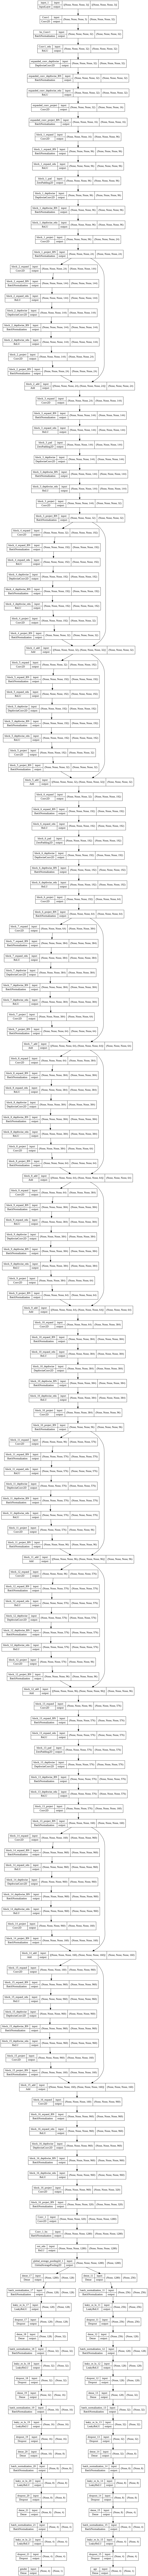

In [59]:
keras.utils.plot_model(model,show_shapes=True)


In [29]:
losses = {
    "age": "mean_absolute_percentage_error",
    "gender": "binary_crossentropy"
    # "ethnicity" : "sparse_categorical_crossentropy"
}
loss_weights = {
    "age": 1.0,
    "gender": 1.0
    
    }

_metrics = {'age':'mse',
           'gender':"accuracy"}

          #  ,'ethnicity':tf.keras.metrics.Accuracy(name='accuracy', dtype=None)}


In [30]:
model.output

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'gender')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>]

In [31]:
          
model.compile(
    optimizer = "adam",
    loss=losses,
              # loss_weights=loss_weights,
              # metrics ={'gender': 'accuracy','age':'mse'}
              metrics = _metrics
              )

In [32]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau,LearningRateScheduler

In [33]:
def lr_decay(epoch, lr):
    if epoch != 0 and epoch % 5 == 0:
        return lr * 0.2
    return lr

In [36]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=3, 
    min_delta=0.001, 
    mode='max'
)

checkpoint_path = 'model_checkpoints/'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,   
    patience=2, 
    min_lr=0.001,
    verbose=2
)
_callbacks = [
            #  LearningRateScheduler(lr_decay, verbose=1),
             custom_early_stopping,
             reduce_lr,
             checkpoint
             ]


In [38]:
hist = model.fit(
    train_dataset,
    validation_data = validation_dataset, 


    epochs = 30,
    batch_size = 32,
     callbacks =_callbacks   
)

Epoch 1/30
223/223 [==============================] - ETA: 0s - loss: 164.0783 - gender_loss: 0.6597 - age_loss: 91.2927 - gender_accuracy: 0.6283 - age_mse: 1415.2152WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,gender_loss,age_loss,gender_accuracy,age_mse,val_loss,val_gender_loss,val_age_loss,val_gender_accuracy,val_age_mse

Epoch 1: saving model to model_checkpoints/
223/223 [==============================] - 1148s 2s/step - loss: 164.0783 - gender_loss: 0.6597 - age_loss: 91.2927 - gender_accuracy: 0.6283 - age_mse: 1415.2152 - val_loss: 172.2694 - val_gender_loss: 0.6831 - val_age_loss: 75.5782 - val_gender_accuracy: 0.5170 - val_age_mse: 1075.9147 - lr: 0.0010
Epoch 2/30
223/223 [==============================] - ETA: 0s - loss: 136.5208 - gender_loss: 0.6280 - age_loss: 89.4873 - gender_accuracy: 0.6501 - age_mse: 1403.8844WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is n

In [40]:
model.save("age_gender.h5")

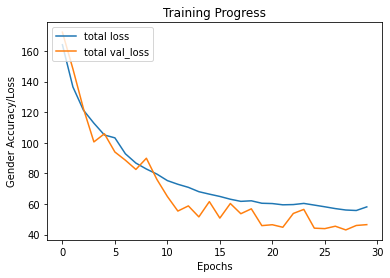

In [50]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Training Progress")
plt.ylabel("Gender Accuracy/Loss")
plt.xlabel("Epochs")
plt.legend(["total loss", "total val_loss"], loc="upper left")
plt.show()


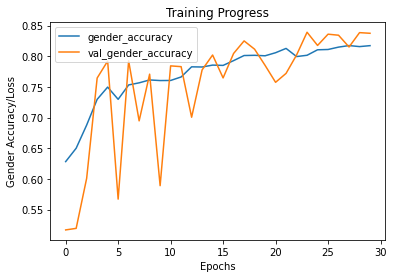

In [44]:
plt.plot(hist.history["gender_accuracy"])
plt.plot(hist.history["val_gender_accuracy"])
plt.title("Training Progress")
plt.ylabel("Gender Accuracy/Loss")
plt.xlabel("Epochs")
plt.legend(["gender_accuracy", "val_gender_accuracy"], loc="upper left")
plt.show()


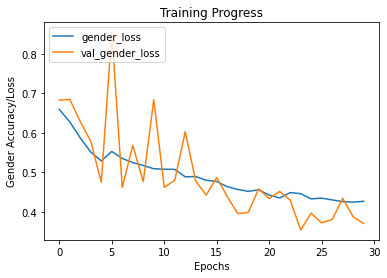

In [45]:
plt.plot(hist.history["gender_loss"])
plt.plot(hist.history["val_gender_loss"])
plt.title("Training Progress")
plt.ylabel("Gender Accuracy/Loss")
plt.xlabel("Epochs")
plt.legend(["gender_loss", "val_gender_loss"], loc="upper left")
plt.show()

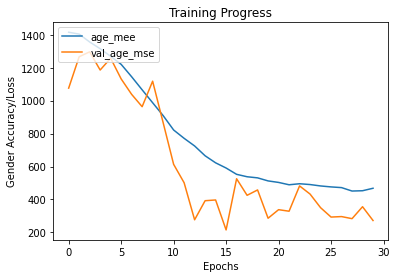

In [51]:
plt.plot(hist.history["age_mse"])
plt.plot(hist.history["val_age_mse"])
plt.title("Training Progress")
plt.ylabel("Age Accuracy/Loss")
plt.xlabel("Epochs")
plt.legend(["age_mee", "val_age_mse"], loc="upper left")
plt.show()

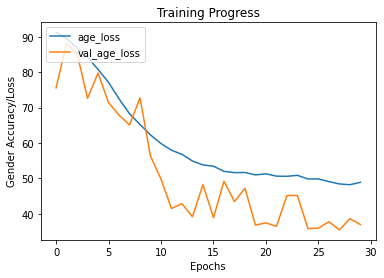

In [52]:
plt.plot(hist.history["age_loss"])
plt.plot(hist.history["val_age_loss"])
plt.title("Training Progress")
plt.ylabel("Age/Loss")
plt.xlabel("Epochs")
plt.legend(["age_loss", "val_age_loss"], loc="upper left")
plt.show()


In [56]:
model.evaluate(test_dataset)

75/75 [==============================] - 66s 878ms/step - loss: 45.2992 - gender_loss: 0.3688 - age_loss: 35.7833 - gender_accuracy: 0.8414 - age_mse: 277.6516


[45.299171447753906,
 0.36881160736083984,
 35.783287048339844,
 0.841383695602417,
 277.651611328125]